In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [87]:
df=pd.read_csv('/content/iris.csv')

In [88]:
df.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.shape

(153, 6)

In [90]:
df.drop('Id',axis= 1,inplace=True)

In [91]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
148,6.2,NaN,NaN,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  152 non-null    float64
 1   sepalwidth   152 non-null    float64
 2   petallength  151 non-null    float64
 3   petalwidth   153 non-null    float64
 4   class        153 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [93]:
#statistical info Range......
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,152.000000,152.000000,151.000000,153.000000
mean,5.819079,3.055263,3.688742,1.179085
std,0.830282,0.431506,1.778709,0.768256
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
df.isnull().sum()

,0
sepallength,1
sepalwidth,1
petallength,2
petalwidth,0
class,0


In [95]:
#to drop
#df.dropna(inplace=True)
#to impute

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill NaN values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


# For non-numeric columns, you can choose a different strategy, e.g., fill with the mode (most frequent value)
#df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])

# Alternatively, if you don't want to fill non-numeric columns at all, you can skip this step




In [96]:
#duplicated
df.duplicated().sum()

6

In [97]:
# values of duplicted
df[df.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa
152,4.7,3.2,1.3,0.2,Iris-setosa


In [98]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [99]:
# is data balanced  it tell me each unique value in the class and its count
df['class'].value_counts()

,count
class,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [100]:
#what is the values inside the column
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [101]:
# number of unique values
df['class'].nunique()

3

# **DV**

<Axes: xlabel='class', ylabel='count'>

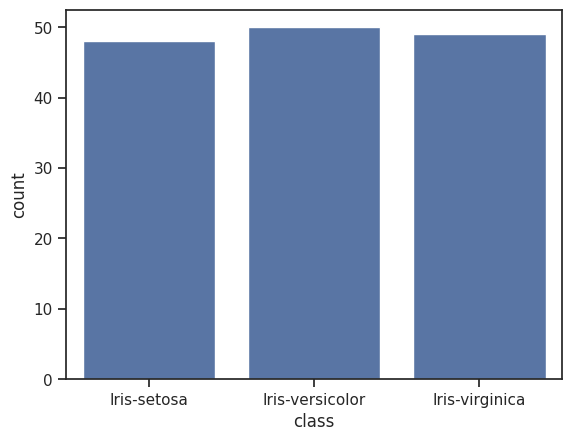

In [102]:
# is data balanced
sns.countplot(x=df['class'])

In [103]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

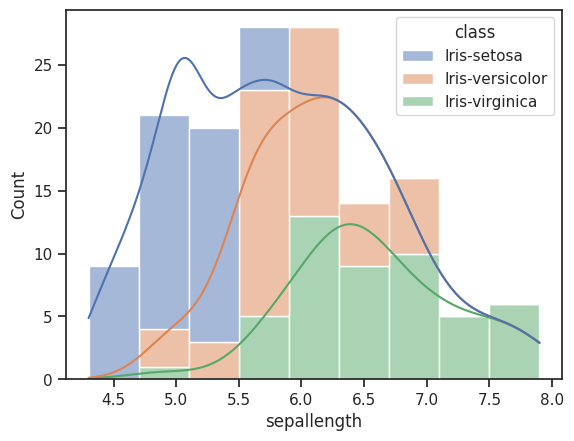

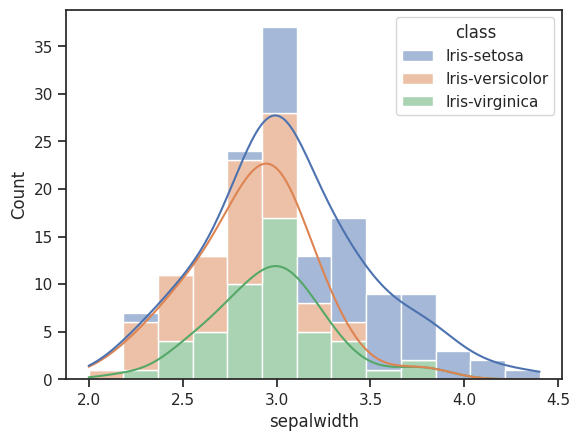

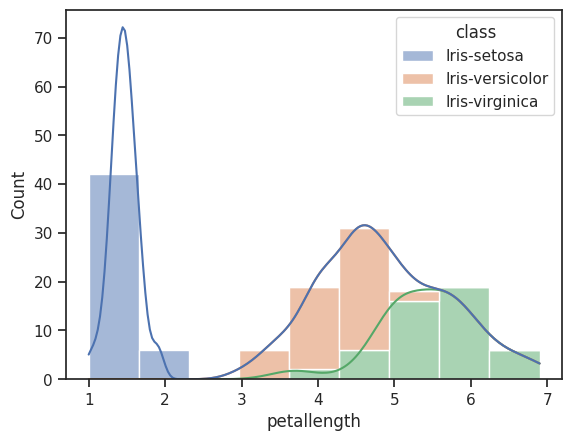

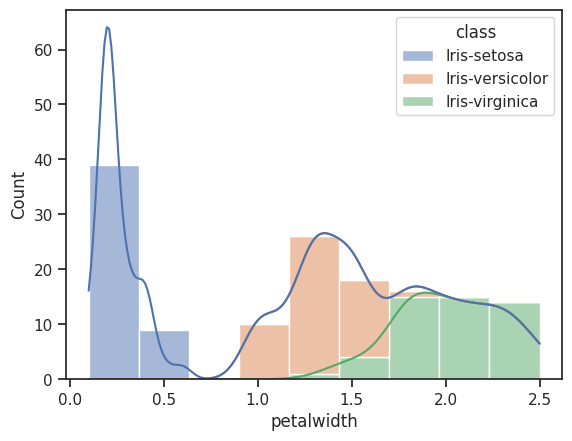

In [104]:
sns.set(style="ticks")  # "ticks" style removes the grid but keeps tick marks
# stack make each one visual
for col in df.select_dtypes('number'):
    sns.histplot(data=df,x=col,hue='class',kde=True, multiple="stack")
    plt.show()


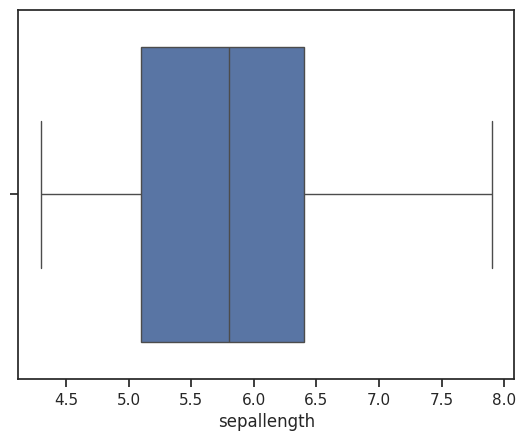

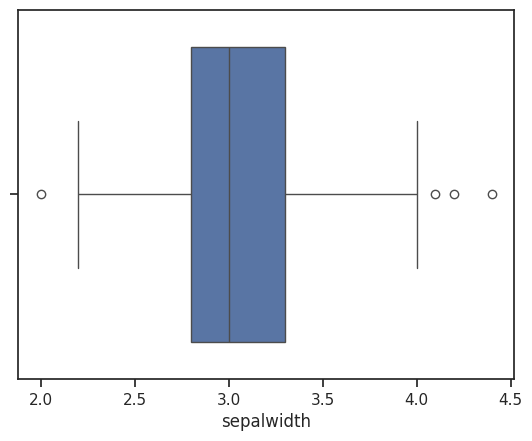

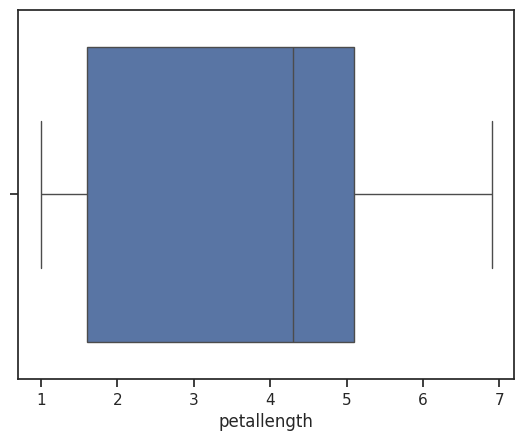

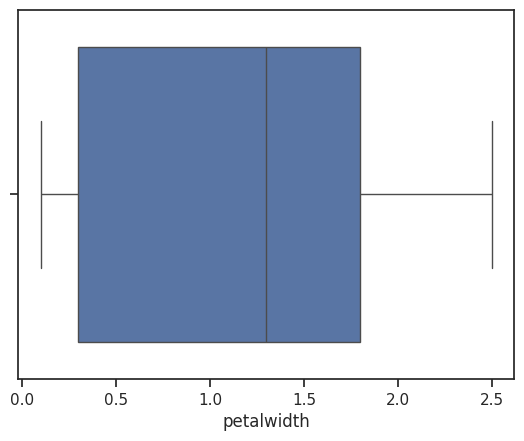

In [105]:
for col in df.select_dtypes('number'):
  sns.boxplot(data=df,x=col)
  plt.show()



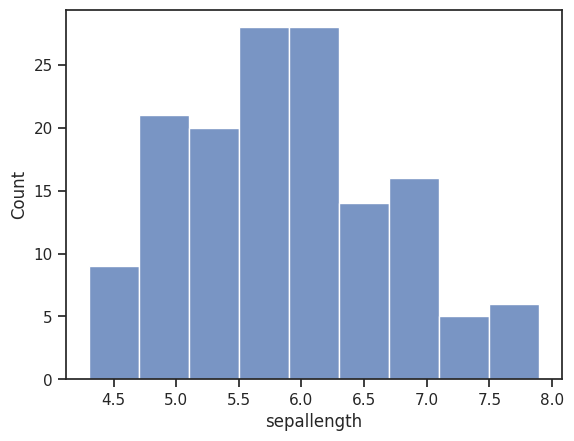

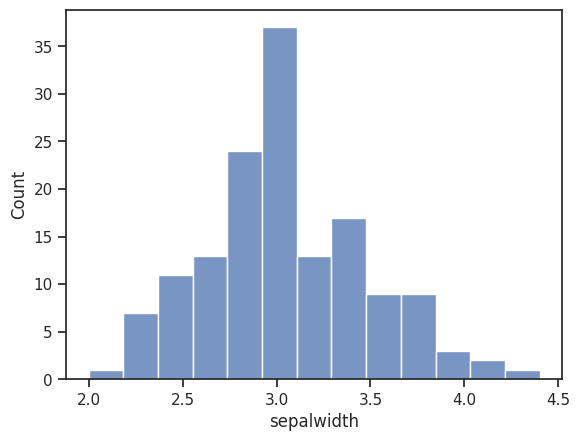

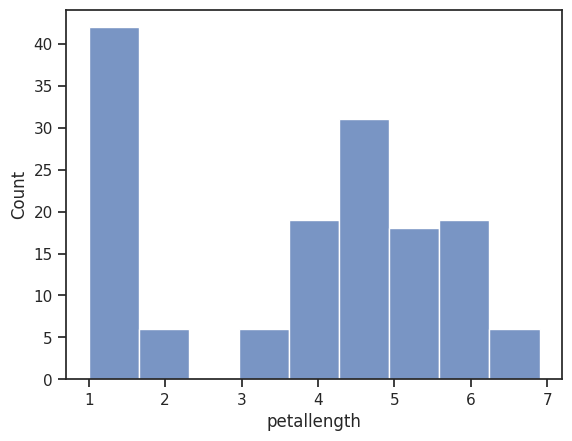

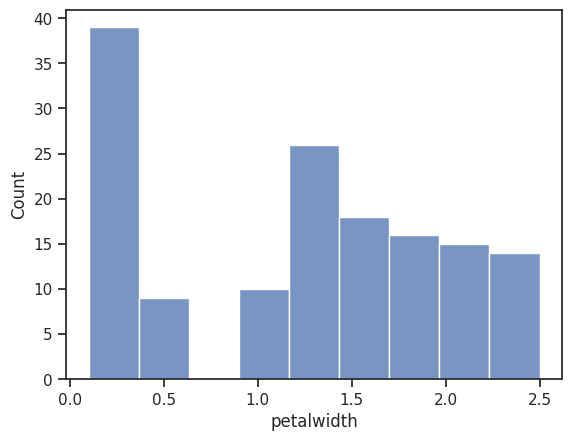

In [106]:
for col in df.select_dtypes('number'):
  sns.histplot(data=df,x=col)
  plt.show()


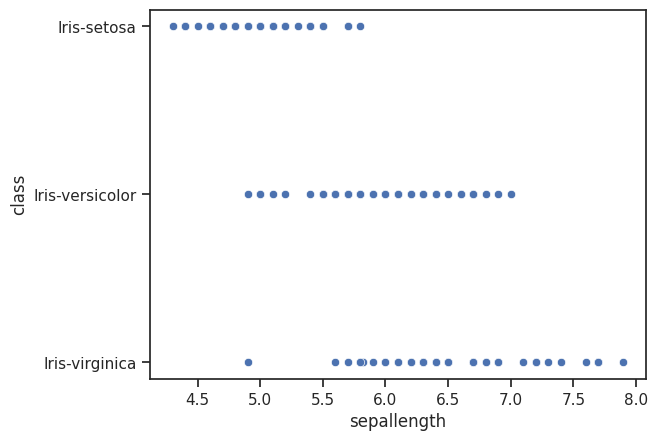

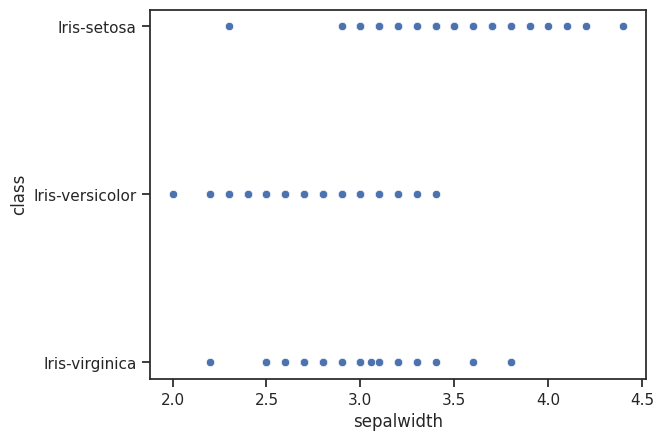

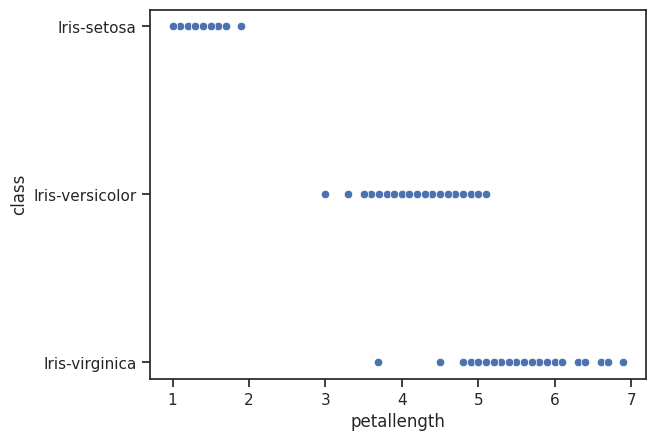

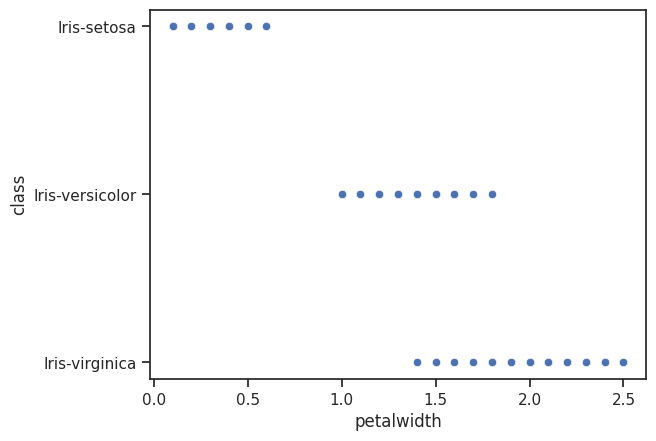

In [107]:
# correlation using scatter plot
for col in df.select_dtypes('number'):
  sns.scatterplot(data=df,x=col,y='class')
  plt.show()

<Axes: xlabel='sepallength', ylabel='petallength'>

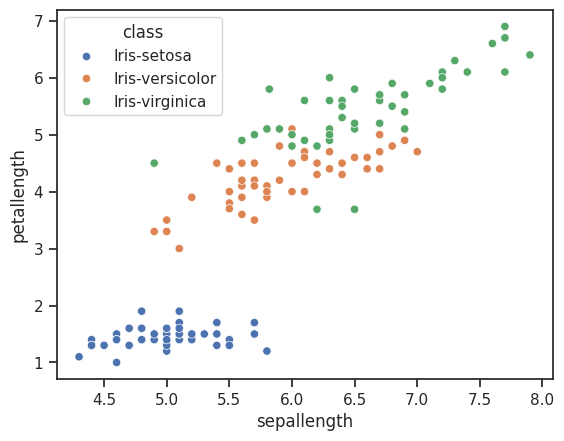

In [108]:
sns.scatterplot(data=df,x='sepallength',y='petallength',hue='class')

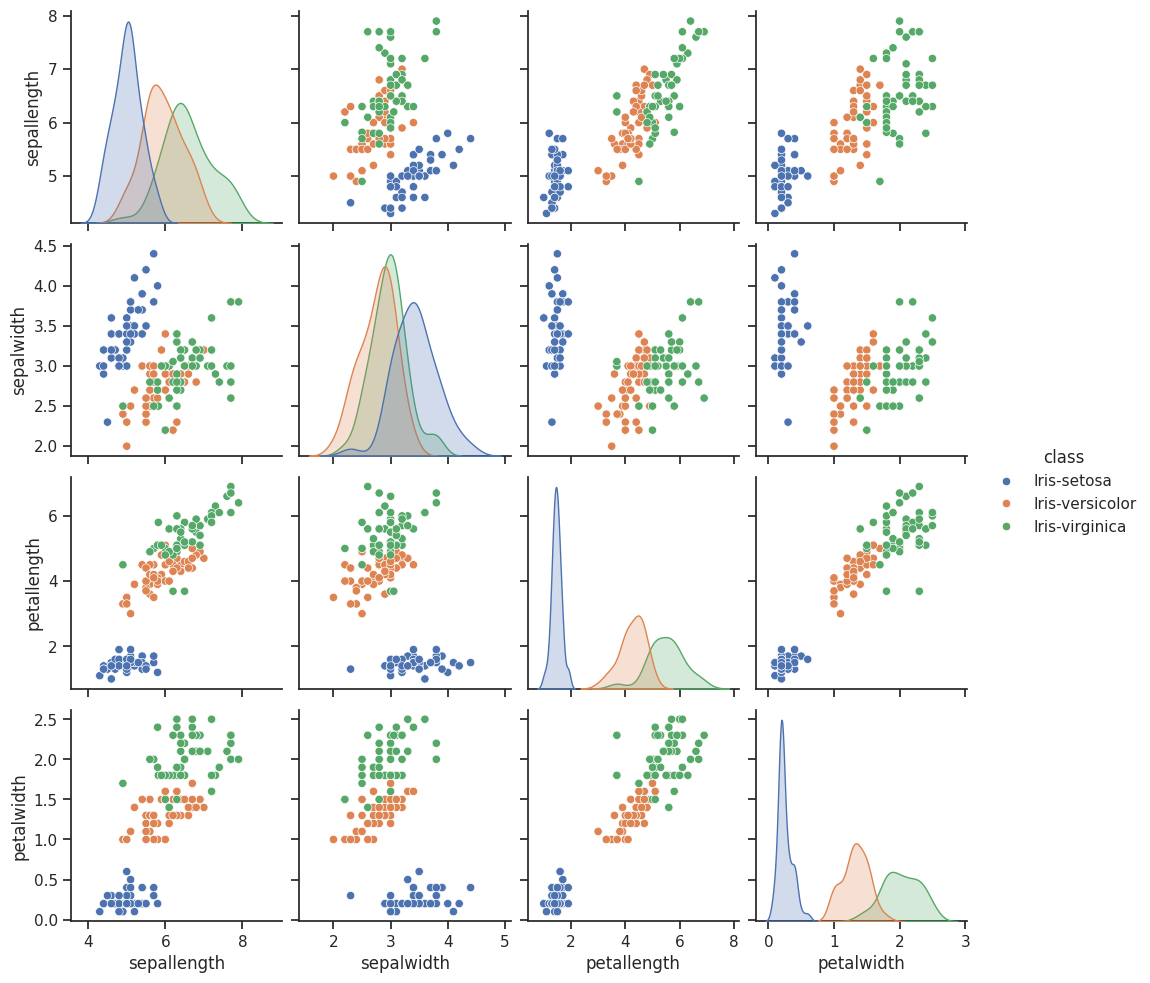

In [109]:
sns.pairplot(df,hue='class')

In [110]:
# corr
#df.corr()
# Select only numeric columns

df.select_dtypes(include=['number']).corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.102931,0.863090,0.814289
sepalwidth,-0.102931,1.000000,-0.428799,-0.364937
petallength,0.863090,-0.428799,1.000000,0.952763
petalwidth,0.814289,-0.364937,0.952763,1.000000


<Axes: >

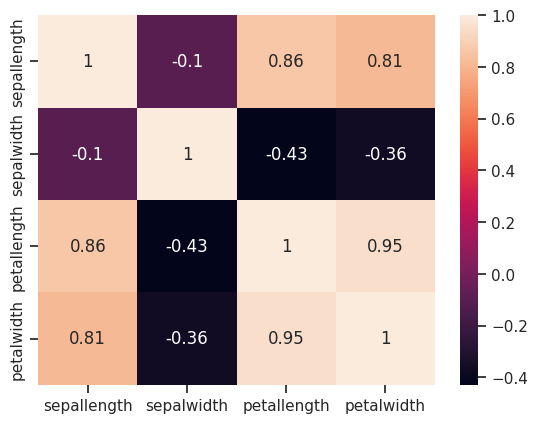

In [111]:
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

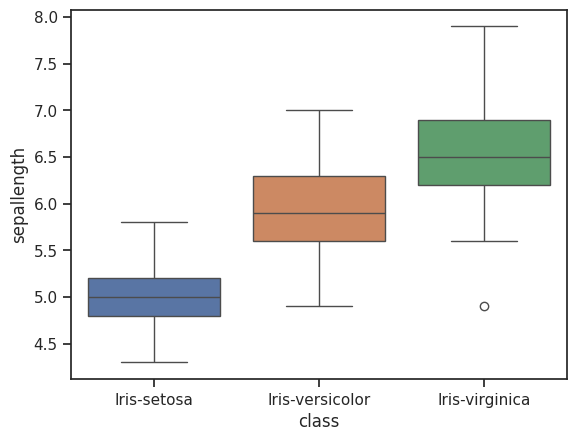

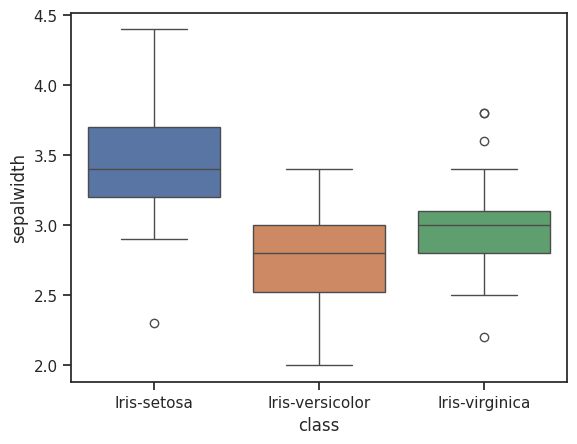

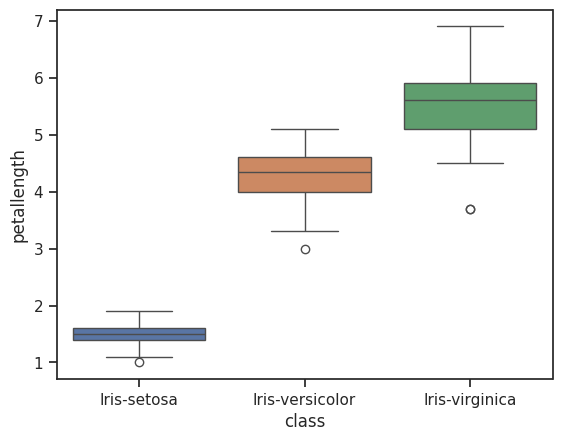

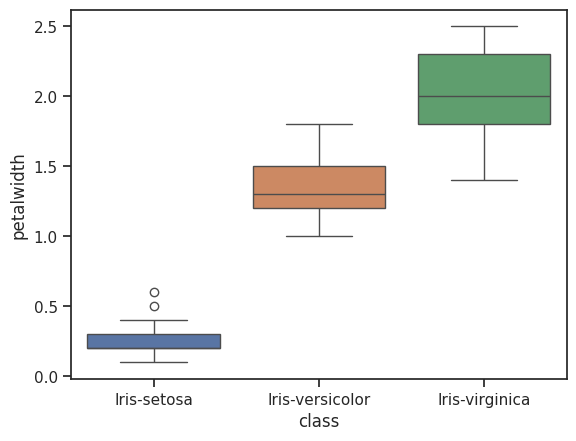

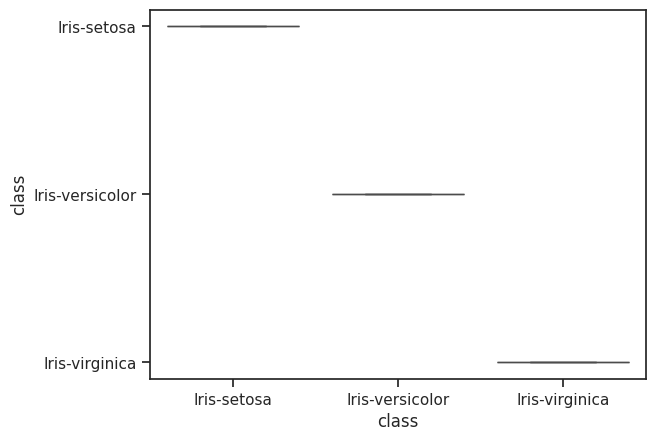

In [112]:
# drop outlier
def graph(y):
  sns.boxplot(x='class', y=y,data=df,hue='class')
  plt.show()

for col in df.columns:
  graph(col)

(147, 5)
(143, 5)


<Axes: ylabel='sepalwidth'>

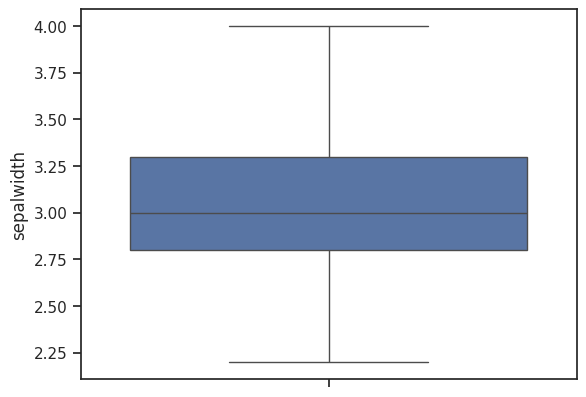

In [113]:
# work with outlier & its place
Q1 = np.percentile(df['sepalwidth'],25)
Q3 = np.percentile(df['sepalwidth'],75)

    # Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
print(df.shape)
    # Determine the outlier bounds
lower_bound =df[df['sepalwidth']<= Q1 - 1.5 * IQR].index
upper_bound =df[df['sepalwidth']>= Q3 + 1.5 * IQR].index

df.drop(upper_bound,inplace=True)
df.drop(lower_bound,inplace=True)

print(df.shape)
sns.boxplot(df['sepalwidth'])


In [115]:
df.to_csv('iriscleaned.csv')